# Proyecto 2. Entrega 3: Naive Bayes
### Integrantes
- Nelson García  
- Diego Linares
- Joaquin Puente
- José Mérida
- Joaquín Campos

Las secciones de análisis exploratorio y separación del modelo se realizaron en la entrega anterior, sin embargo consideramos importante tener esta información a la mano para poder referenciarla dentro de este mismo documento.

## Análisis exploratorio

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn import metrics

### Carga de Datos y Revisión General

In [5]:
# estaremos definiendo ambos csvs para poder tener acceso a ambos pero usaremos el train y luego sobre el test replicaremos una vez se considere importante

# Definir NA como nuestros NaN
dftrain = pd.read_csv("train.csv", na_values=["NA"])

# incluimos en el analissi exploratorio lo basico para poder tenerlo a la mano
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# datos estadísticos básicos
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# tipos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Revisamos posibles variables redundantes entre sí mismas
print(dftrain.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


### Separación de Columnas por Tipo de Variable
Algunas columnas cómo MSSubClass son categóricas nominales y cuentan con valores numéricos, además algunas otras columnas cómo pueden ser las de clasificación de estado son ordinales y tienen un encoding categórico (ej. Ex - Excelente en ExterCond). Es importante que clasifiquemos las diferentes variables para poder llevar a cabo el encoding de manera correcta y realizar nuestro análisis exploratorio. Tenemos 3 categorías:

- Ordinales
- Nominales
- Numéricas

Este proceso se lleva a cabo antes de depurar las columnas que no se utilizarán en el procesamiento de datos para evitar la necesidad de mantener en mente las columnas eliminadas al categorizar.

In [9]:
col_ordinales = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                 'BsmtExposure', 'HeatingQC',  'GarageQual', 'GarageCond', 'FireplaceQu',  'Functional',
                 'KitchenQual', 'PoolQC', 'Fence']
col_nominales = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
                 'GarageFinish','GarageType','PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
col_numericas = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

Definimos una función para retornar el tipo de variable de cada columna

In [10]:
def get_type(col):
  if col in col_numericas + ['SalePrice']:
    return 'numerica'
  elif col in col_nominales:
    return 'nominal'
  elif col in col_ordinales:
    return 'ordinal'

Verificamos que todas las columnas se hayan ingresado correctamente

In [11]:
unassigned = []
for col in dftrain.columns:
  if get_type(col) == None:
    unassigned.append(col)

print(unassigned)

['Id']


### Datos Faltantes
En este paso vamos a analizar datos faltantes

Primero verificamos las columnas con valores nulos, para tener una mejor idea de que necesitamos hacer

In [12]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


Nos damos cuenta que PoolQC tiene 99.5% de valores faltantes, ¿Por qué?

Algunas de las variables categóricas tienen cómo categoría "NA" y se toma como valor nulo al cargar los datos al DF. Creamos una lista con las variables que cuentan con esta característica

In [13]:
na_as_data_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature',
                   'MasVnrType', 'GarageQual', 'GarageCond']

dftrain[na_as_data_cols] = dftrain[na_as_data_cols].fillna('Missing')

Revisando nuevamente las columnas con valores nulos

In [14]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
                  ...    
ExterQual        0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
SalePrice        0.000000
Length: 81, dtype: float64


Ahora tenemos valores faltantes más manejables, primero vamos a tomar LotFrontage y GarageYrBlt y reemplazar los valores faltantes con la mediana. Esto debido a que el 17.73% y 5.54% siguen siendo cifras bastante significativas y no podemos simplemente eliminar estas filas.

In [15]:
cols_to_fill = ['LotFrontage', 'GarageYrBlt']

medians = dftrain[cols_to_fill].median()

dftrain[cols_to_fill] = dftrain[cols_to_fill].fillna(medians)

Revisando nuevamente los valores nulos

In [16]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

MasVnrArea      0.547945
Electrical      0.068493
GarageFinish    0.000000
GarageType      0.000000
FireplaceQu     0.000000
                  ...   
MasVnrType      0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


Ahora con una pequeña cantidad de valores faltantes, podemos simplemente remover las filas que los contengan.

In [17]:
dftrain = dftrain.dropna()

missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

Id             0.0
CentralAir     0.0
GarageYrBlt    0.0
GarageType     0.0
FireplaceQu    0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 81, dtype: float64


Ya no tenemos valores faltantes dentro de nuestro DF

### Encoding de Variables Categóricas
En este paso vamos a codificar las variables categóricas, las ordinales utilizando OrdinalEncoder y las nominales utilizando get_dummies. De esta manera podemos utilizar las variables ordinales cómo numéricas y aplicar las nominales a nuestro análisis.

Identificamos los diferentes valores que puedan tomar las variables dentro del dataset

In [18]:
for col in col_ordinales:
    print(f"{col}: {dftrain[col].unique()}")

OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual: ['Gd' 'TA' 'Ex' 'Missing' 'Fa']
BsmtCond: ['TA' 'Gd' 'Missing' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'Missing']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']
GarageCond: ['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']
FireplaceQu: ['Missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
PoolQC: ['Missing' 'Ex' 'Fa' 'Gd']
Fence: ['Missing' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


Aplicamos el encoding

In [19]:
# Diferentes categorías para las diferentes columnas
standard_categories = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing']
fence_categories = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'Missing']
bsmt_exposure_categories = ['No', 'Mn', 'Av', 'Gd', 'Missing']
functional_categories = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Missing']

cleaned_ordinales = [x for x in col_ordinales if x not in ['OverallQual', 'OverallCond']]

# Limpiamos los entries quitando posibles errores de espacios
dftrain[cleaned_ordinales] = dftrain[cleaned_ordinales].astype(str).apply(lambda x: x.str.strip())

# Asignación de categorías a columnas
categories = []
for col in cleaned_ordinales:
    if col == 'Fence':
        categories.append(fence_categories)
    elif col == 'BsmtExposure':
        categories.append(bsmt_exposure_categories)
    elif col == 'Functional':
        categories.append(functional_categories)
    else:
        categories.append(standard_categories)

# Inicialización y aplicación de encoder
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
dftrain[cleaned_ordinales] = encoder.fit_transform(dftrain[cleaned_ordinales]).astype(int)

# Verificacion de filas sin encodear
print((dftrain[cleaned_ordinales] == -1).sum())

# Conteo de valores por cada columna
for col in cleaned_ordinales:
    print(f"{col}:")
    print("\n".join([f"{val} - {count}" for val, count in dftrain[col].value_counts().items()]))
    print()


ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
HeatingQC       0
GarageQual      0
GarageCond      0
FireplaceQu     0
Functional      0
KitchenQual     0
PoolQC          0
Fence           0
dtype: int64
ExterQual:
2 - 905
1 - 481
0 - 51
3 - 14

ExterCond:
2 - 1273
1 - 146
3 - 28
0 - 3
4 - 1

BsmtQual:
2 - 648
1 - 611
0 - 120
5 - 37
3 - 35

BsmtCond:
2 - 1303
1 - 64
3 - 45
5 - 37
4 - 2

BsmtExposure:
0 - 945
2 - 221
3 - 133
1 - 114
4 - 38

HeatingQC:
0 - 734
2 - 427
1 - 240
3 - 49
4 - 1

GarageQual:
2 - 1302
5 - 81
3 - 48
1 - 14
0 - 3
4 - 3

GarageCond:
2 - 1317
5 - 81
3 - 35
1 - 9
4 - 7
0 - 2

FireplaceQu:
5 - 685
1 - 378
2 - 311
3 - 33
0 - 24
4 - 20

Functional:
0 - 1352
2 - 34
1 - 31
3 - 15
4 - 13
5 - 5
6 - 1

KitchenQual:
2 - 734
1 - 579
0 - 99
3 - 39

PoolQC:
5 - 1444
1 - 3
0 - 2
3 - 2

Fence:
4 - 1170
1 - 157
0 - 59
2 - 54
3 - 11



Para las variables nominales, utilizamos get_dummies.

In [20]:
dftrain = pd.get_dummies(dftrain, columns=col_nominales, prefix_sep='_')
dftrain

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,1,2,...,False,False,False,True,False,False,False,False,True,False
1,2,80.0,9600,6,8,1976,1976,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False
2,3,68.0,11250,7,5,2001,2002,162.0,1,2,...,False,False,False,True,False,False,False,False,True,False
3,4,60.0,9550,7,5,1915,1970,0.0,2,2,...,False,False,False,True,True,False,False,False,False,False
4,5,84.0,14260,8,5,2000,2000,350.0,1,2,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False
1456,1457,85.0,13175,6,6,1978,1988,119.0,2,2,...,False,False,False,True,False,False,False,False,True,False
1457,1458,66.0,9042,7,9,1941,2006,0.0,0,1,...,False,False,False,True,False,False,False,False,True,False
1458,1459,68.0,9717,5,6,1950,1996,0.0,2,2,...,False,False,False,True,False,False,False,False,True,False


Con el output podemos observar que ya se encuentran codificadas nuestras variables categóricas ordinales utilizando valores numéricos.

### Depuración de Datos
En este paso revisamos si existen datos duplicados

Eliminación de Filas Duplicadas

In [21]:
before = dftrain.shape[0]

# Eliminar duplicados
dftrain = dftrain.drop_duplicates()
after = dftrain.shape[0]
print(f"Filas eliminadas: {before - after}")

Filas eliminadas: 0


No existen filas duplicadas.

dftrain.drop('id', axis=2, inplace=True)

### Exploración Variable de Respuesta
En este paso buscamos obtener más información sobre la variable respuesta, ya que nuestro interés es buscar predecirla.

¿Cómo se distribuye?

[Text(0.5, 1.0, 'Distribucion de SalePrice'),
 Text(0.5, 0, 'Precio de Venta'),
 Text(0, 0.5, 'Cantidad de Casas')]

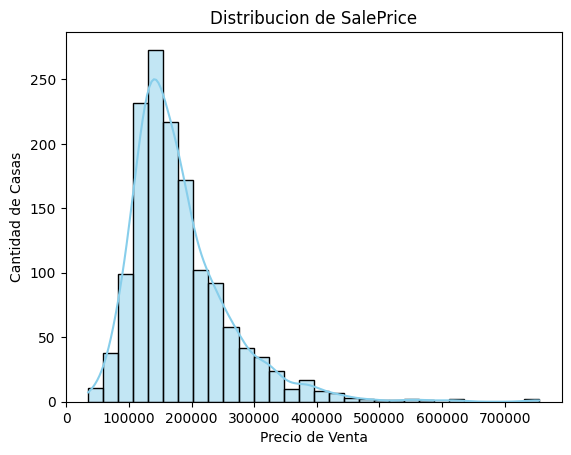

In [22]:
sns.histplot(dftrain['SalePrice'], kde=True, color='skyblue', bins=30).set(title='Distribucion de SalePrice', xlabel='Precio de Venta', ylabel='Cantidad de Casas')

La variable SalePrice sigue una distribución cerca de la normal, con un sesgo hacia la derecha. Esto quiere decir que hay más casas con precios bajos a medios y pocas con precios muy altos. A parte del análisis gráfico, podemos obtener algunos datos adicionales

In [23]:
print(dftrain['SalePrice'].describe())
print("Skewness:", dftrain['SalePrice'].skew())

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8831110462405252


¿Cuáles variables se correlacionan con la variable objetivo?

In [24]:
# cuántas categorías únicas hay por columna?
print(dftrain.select_dtypes(include=['object']).nunique())

print("Distribucion de categorias por columna: ")
# Distribución de categorías por columna
for col in dftrain.select_dtypes(include=['object']).columns:
    print(dftrain[col].value_counts())

Series([], dtype: float64)
Distribucion de categorias por columna: 


Gracias a este output podemos "observar" de forma rápida, que algunas de las variables como utilities, un poco LandSlope, Condition2 y tal vez otras variables pueden ser eliminadas, pero necesitamos poder justificar, de esta forma igual ya nos podemos hacer una idea de como hay algunas variables que tienen poca relevancia.

### Exploración Variables Categóricas Ordinales
En este paso buscamos obtener más información sobre las variables categóricas ordinales, buscando identificar cómo se distribuyen y que nos dicen sobre las casas del dataset

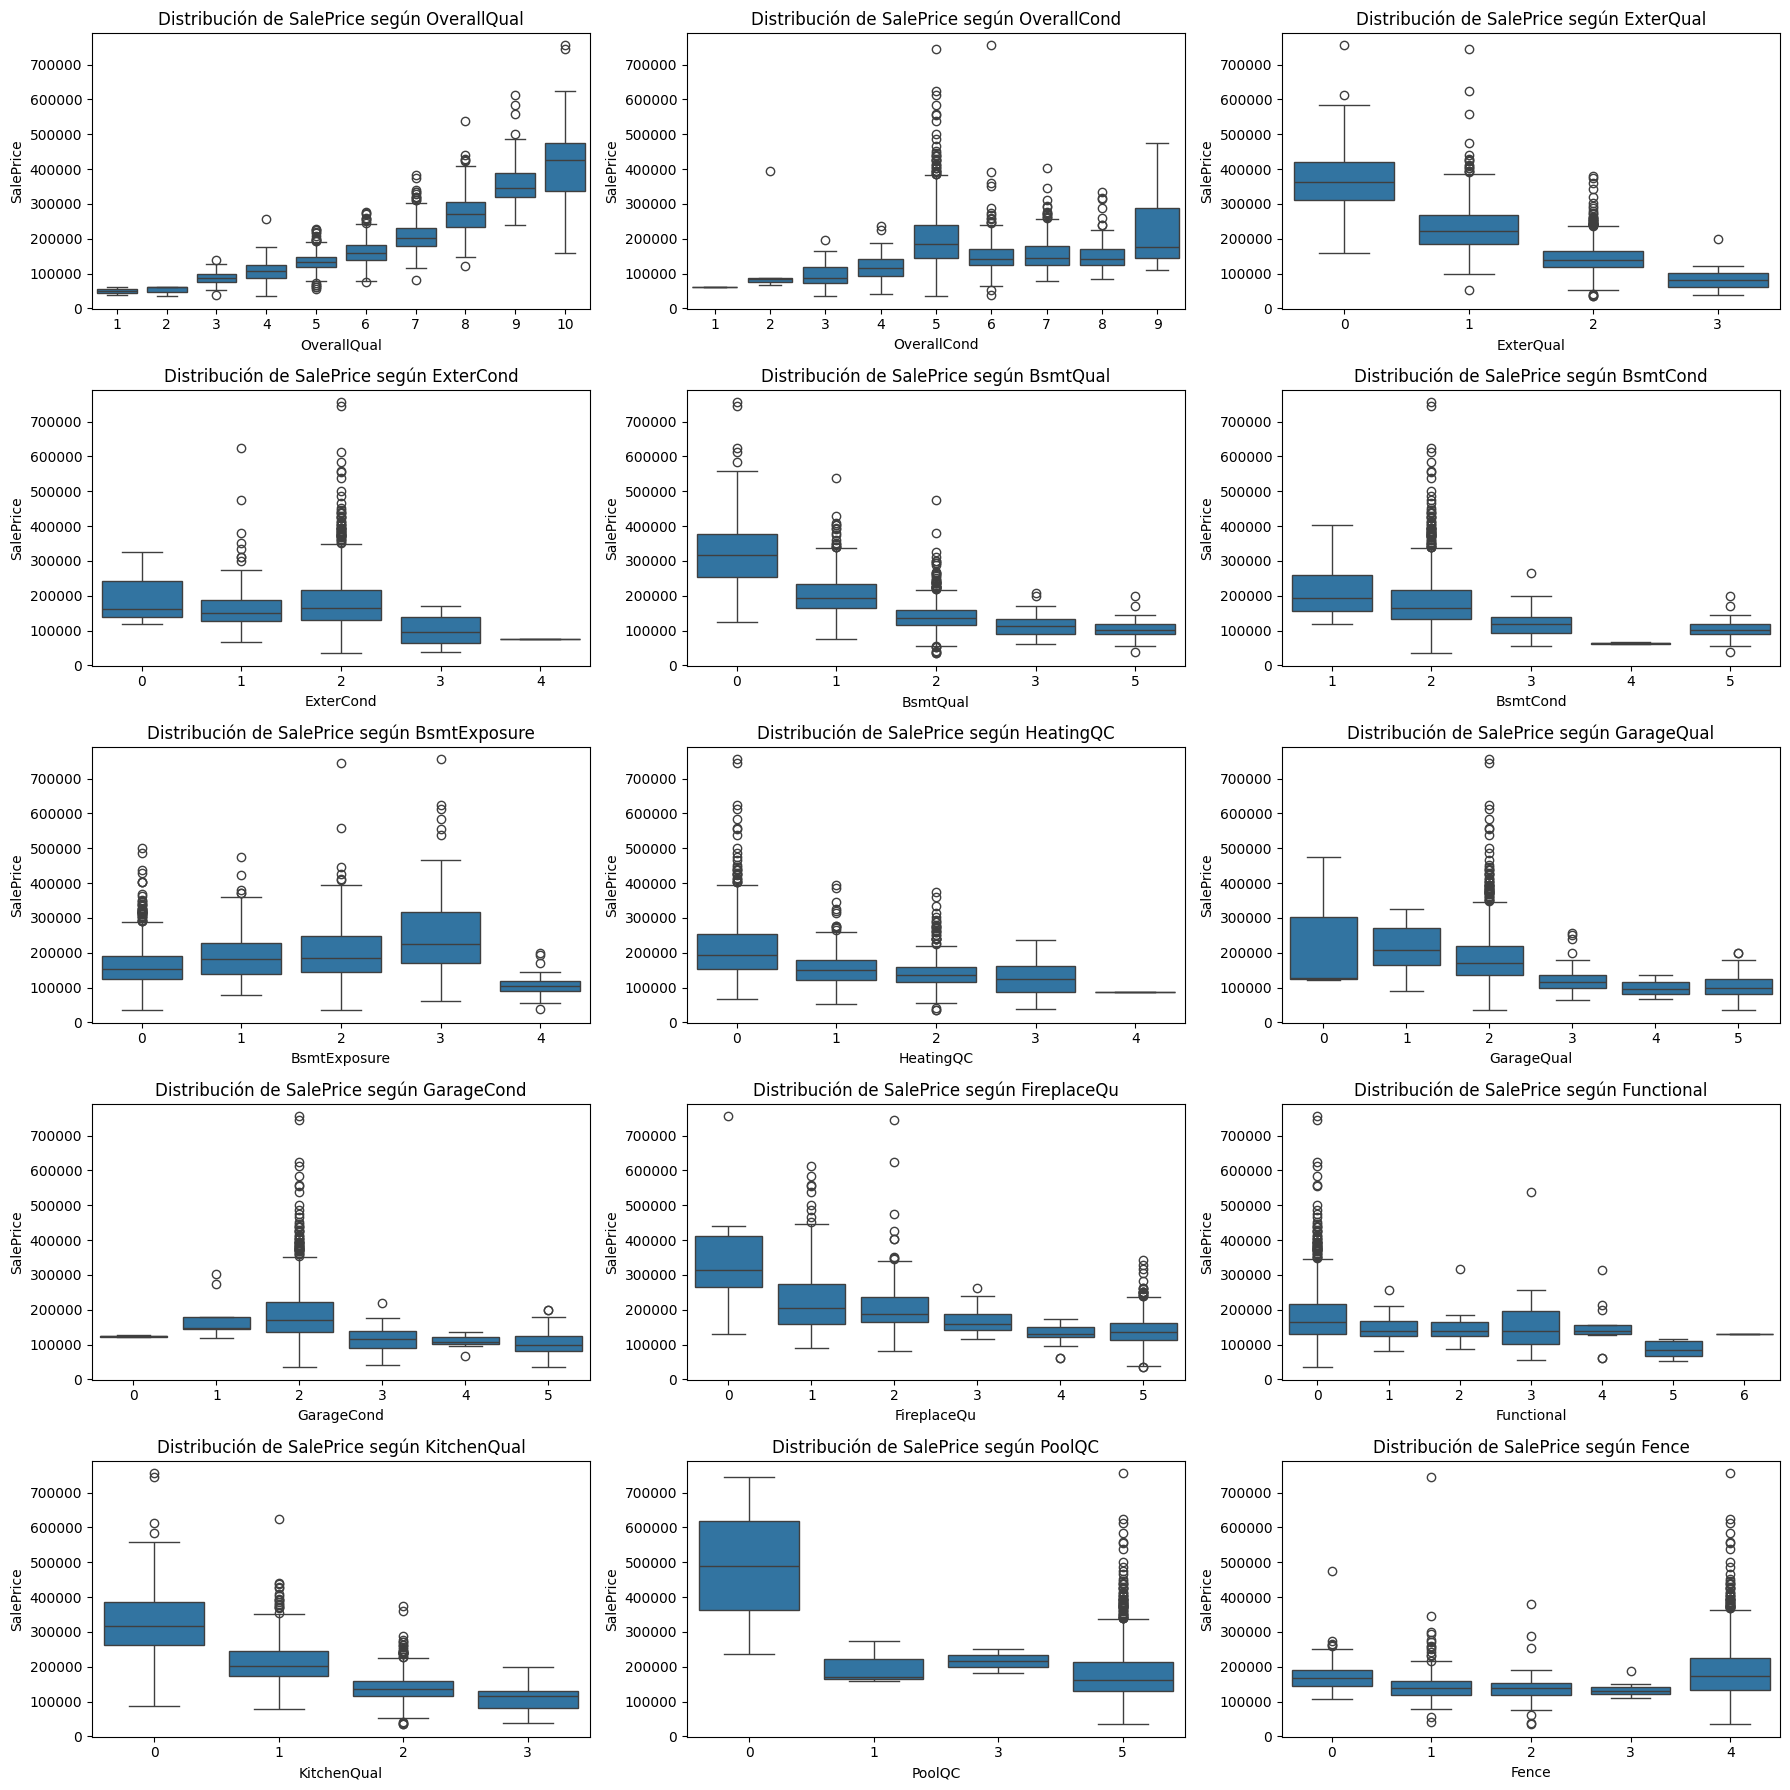

In [25]:
# Generar gráficos para cada variable ordinal con respecto a SalePrice
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(col_ordinales):
    if col in dftrain.columns and dftrain[col].nunique() > 1:
        sns.boxplot(data=dftrain, x=col, y="SalePrice", ax=axes[i])
        axes[i].set_title(f"Distribución de SalePrice según {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("SalePrice")
    else:
        axes[i].axis('off')  # Ocultar gráficos vacíos

plt.tight_layout()
plt.show()


Con base en la información que nos presentan los gráficos anteriores

Podemos concluir que
- La calidad general (OverallQual) es el factor ordinal más importante para determinar SalePrice.
- Las características internas como KitchenQual y FireplaceQu tienen un fuerte impacto en el valor de la vivienda.
- Condiciones estructurales (OverallCond, Functional) tienen menos influencia.
- Elementos adicionales como piscinas pueden elevar significativamente el precio, pero su presencia es rara.

### Exploración Variables Categóricas Nominales

C:\Users\jjcam\AppData\Local\Temp\ipykernel_17604\1708458750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


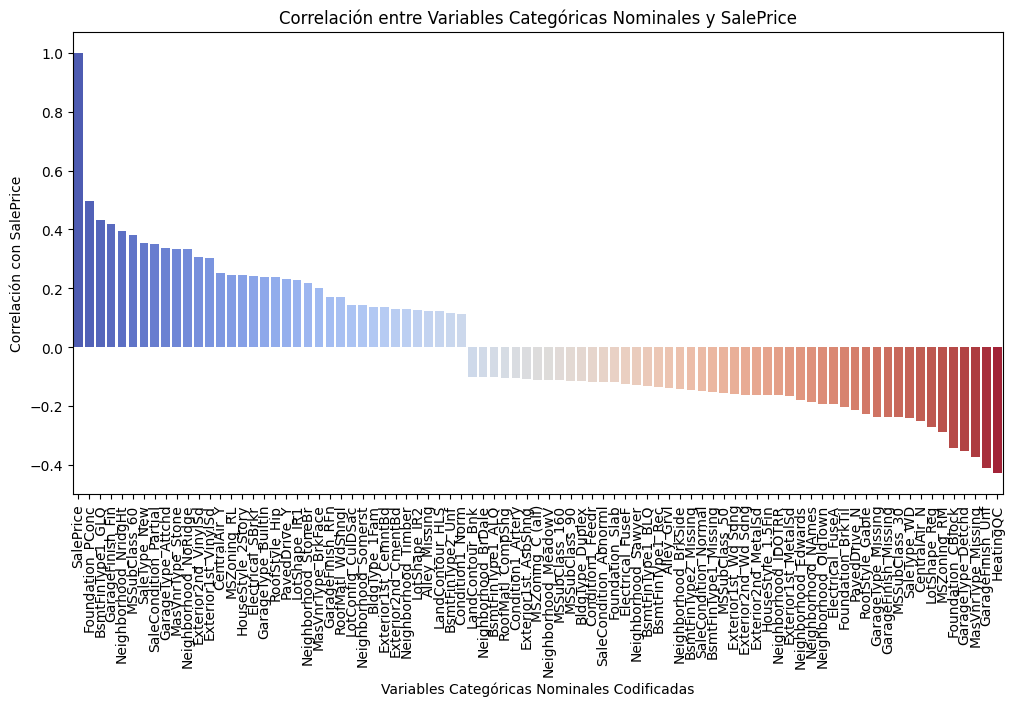

In [26]:
# Seleccionar solo las columnas codificadas
encoded_cols = [col for col in dftrain.columns if any(col.startswith(nom) for nom in col_nominales)]

# Calcular la correlación de las variables categóricas nominales con SalePrice
correlations = dftrain[encoded_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Graficar las correlaciones más significativas
correlations = correlations.dropna()
correlations = correlations[correlations.abs() > 0.1]  # Filtrar solo las más relevantes

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Variables Categóricas Nominales Codificadas")
plt.ylabel("Correlación con SalePrice")
plt.title("Correlación entre Variables Categóricas Nominales y SalePrice")
plt.show()


Con base en la gráfica anterior, podemos observar que

- Ubicación (Neighborhood) es uno de los factores más determinantes en el precio de venta, se menciona por todos los campos que incluyen a (Neighborhood)
- La calidad del cimiento (Foundation), el sótano (BsmtFinType1), el acabado del garaje (GarageFinish) y el tipo de vivienda también influyen significativamente.
- Ciertas configuraciones como garajes separados o sistemas de calefacción deficientes pueden reducir el valor.
- Algunas variables nominales, aunque intuitivamente importantes, tienen una baja correlación y pueden no ser determinantes.

### Exploracion Variables Numéricas

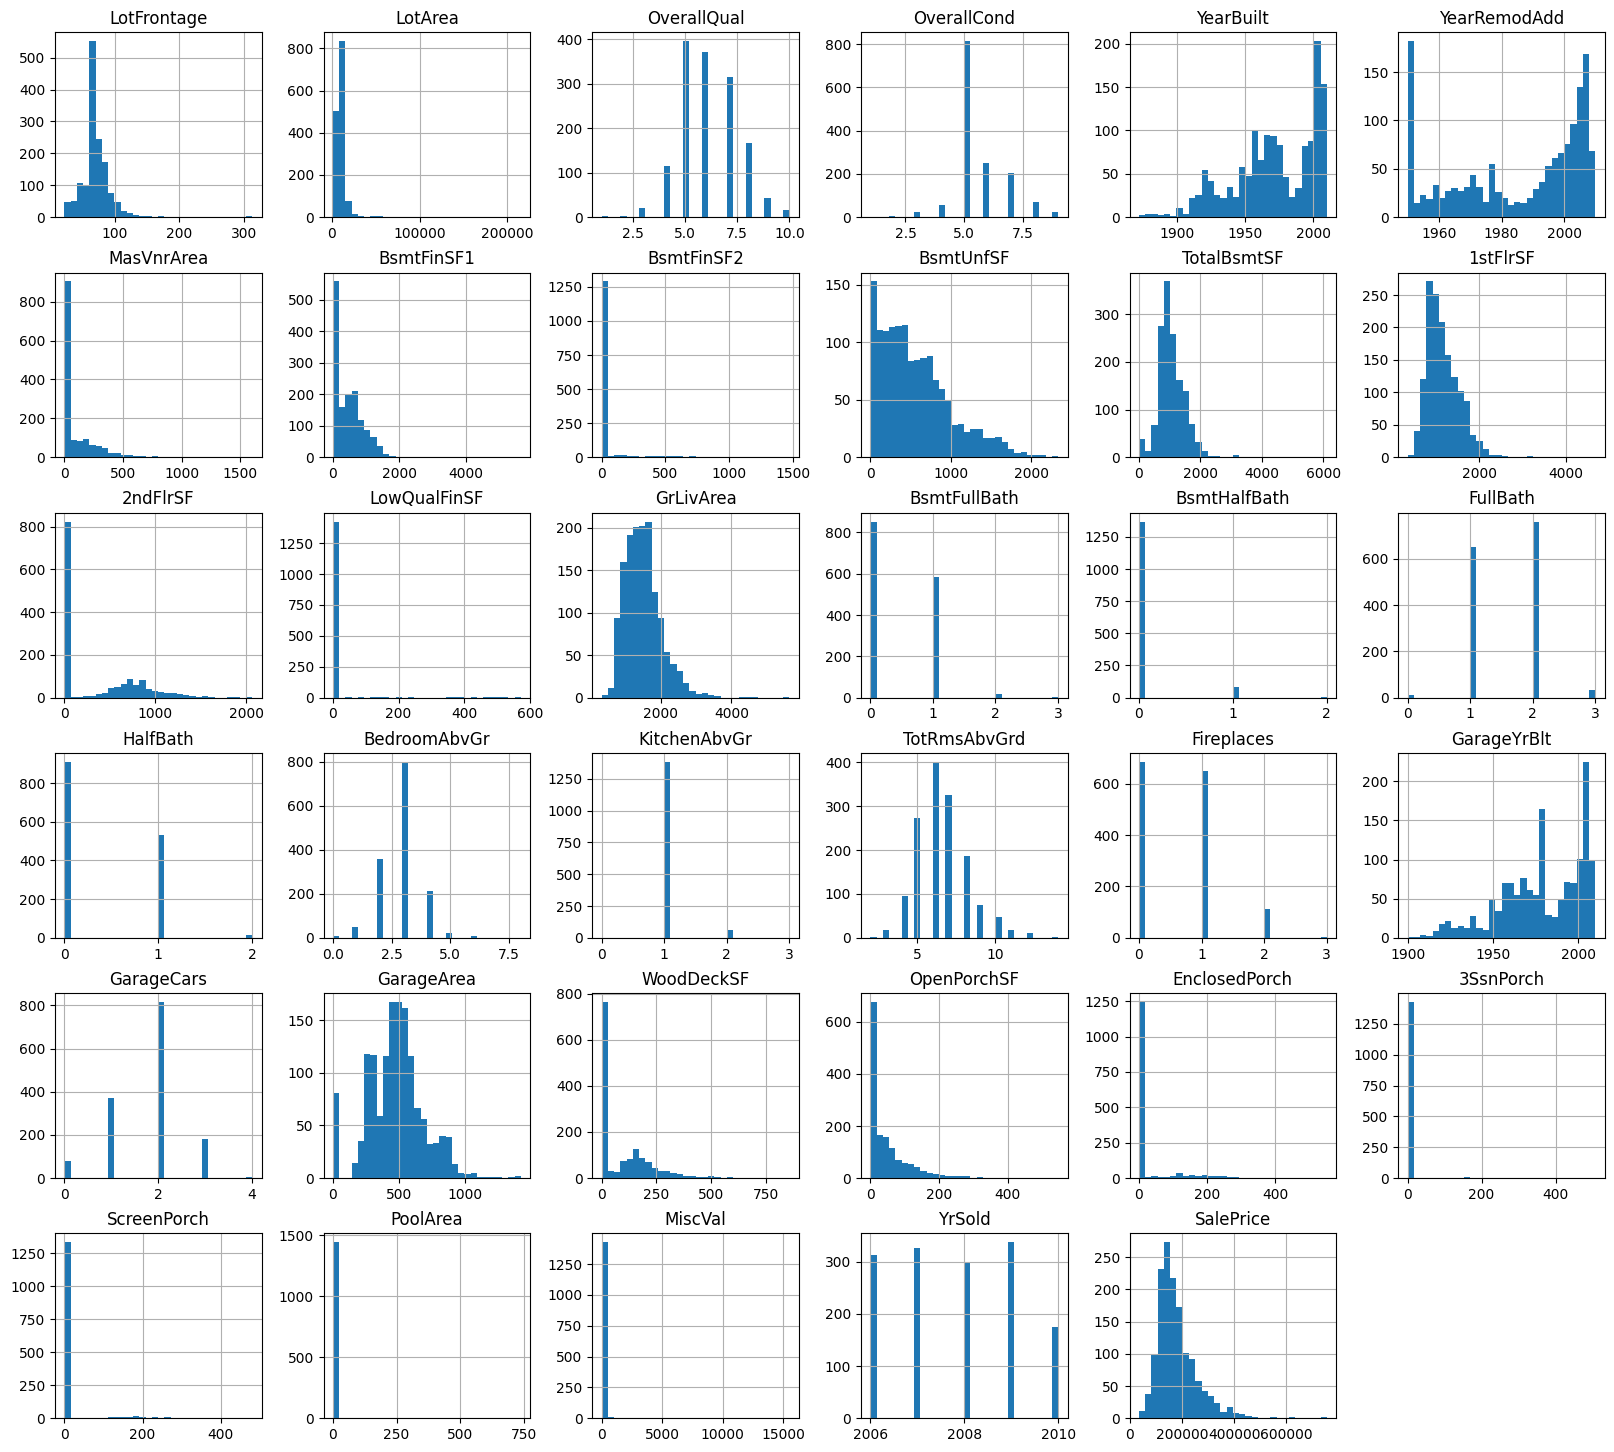

In [27]:
df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop('Id', axis=1)
# Visualizacion y observacion variables numericas
df_num.hist(figsize=(20, 18), bins=30)
plt.show()

Gracias a esto podemos imaginar que hay bastantes variables con nulas, o como wooddeckSF en donde parece que la varianza es baja podemos identificar tambien que ademas hay bastantes varaibles que pueden sernos de gran utilidad en la busqueda de salesPrice pero sobre todo variables que tienden a una moda y como estas distribuciones que podriamos usar.

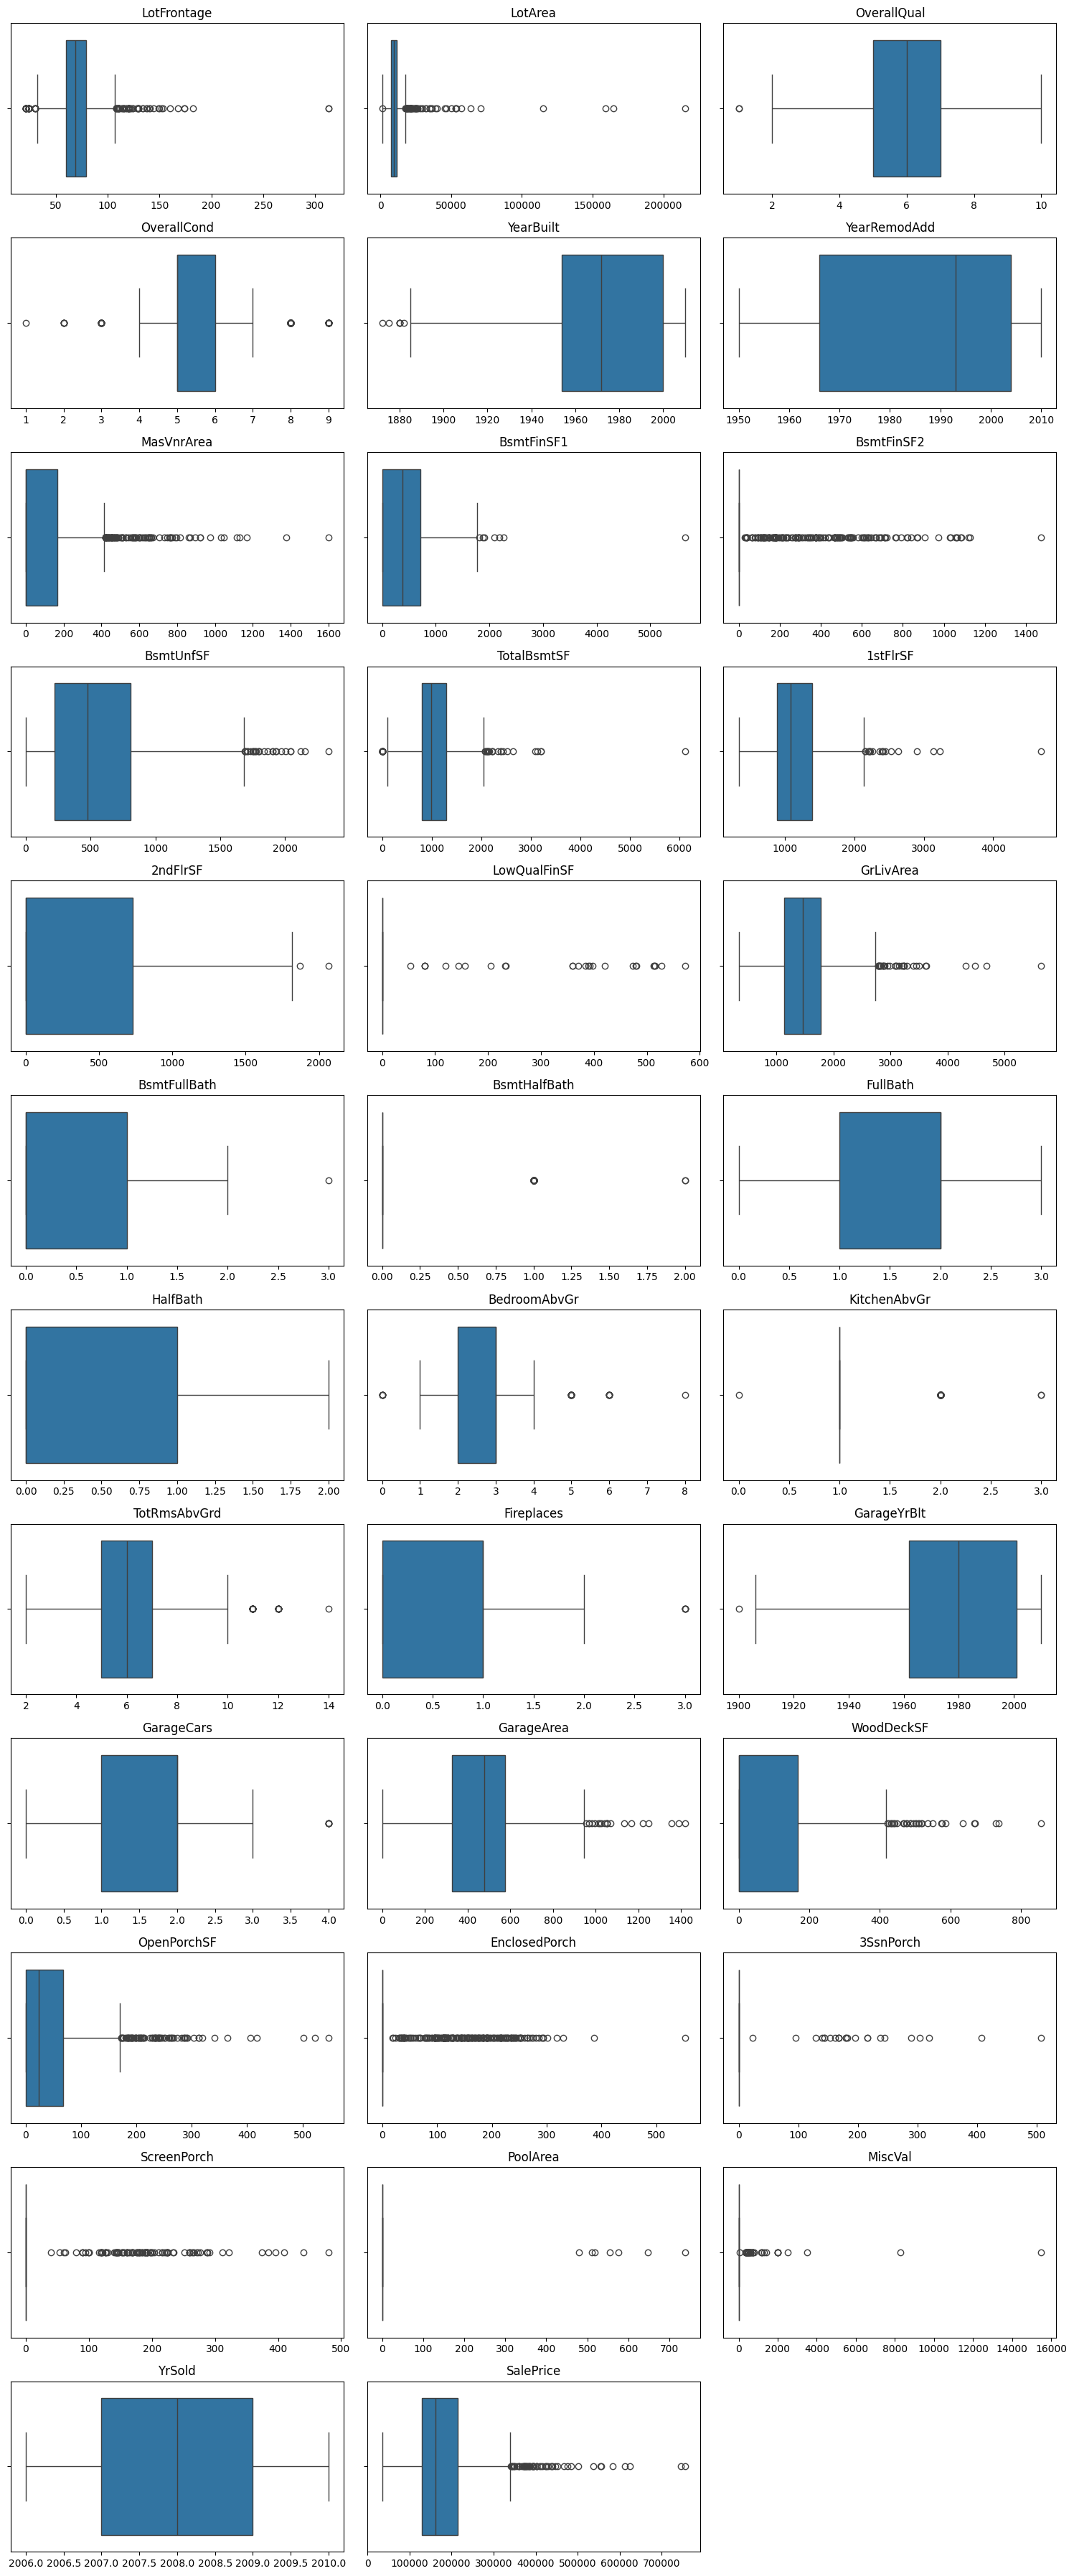

In [28]:
# Crear un solo gráfico con subplots
num_cols = len(df_num.columns)
ncols = 3
nrows = (num_cols // ncols) + (num_cols % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=df_num[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

# Ocultar gráficos vacíos si hay menos columnas que subplots
total_axes = len(axes)
for i in range(num_cols, total_axes):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Segun esto podemos ver que la correlacion entre las variables númericas pero aún asi no podemos descartar ninguna variable porque la correlacion no tienen numeros altos para poder eliminarla con justificacion.

## Separación del modelo

Gracias a ambos analisis, podemos determinar que la variable con mas relacion a SalePrice, es OverallQual, de esta forma para hacer la particion del subconjunto de prueba y entrenamiento, podemos ayudarnos de esta.

Se usará la particion 80/20 de manera que el 80% del dataset(train.csv) se usará para entrenamiento, y el 20% del dataset(train.csv) se usara para prueba.

In [29]:
train_set_strat, test_set_strat = train_test_split(
    dftrain,
    test_size=0.2,
    stratify=dftrain["OverallQual"],
    random_state=42  #Asegura reproducibilidad
)

print("Tamaño de train:", train_set_strat.shape[0])
print("Tamaño de test:", test_set_strat.shape[0])

train_distribution = train_set_strat["OverallQual"].value_counts(normalize=True).sort_index()
test_distribution = test_set_strat["OverallQual"].value_counts(normalize=True).sort_index()

distribution_df = pd.DataFrame({
    "OverallQual": train_distribution.index,
    "Train Proportion": train_distribution,
    "Test Proportion": test_distribution.reindex(train_distribution.index, fill_value=0)
}).reset_index(drop=True)

Tamaño de train: 1160
Tamaño de test: 291


[link text](https://)## 1. Regresion con Naive Bayes

Primero separamos los splits X, Y de los sets de entrenamiento y prueba

In [30]:
from sklearn.naive_bayes import GaussianNB

X_train = train_set_strat.drop(columns=['SalePrice'])
Y_train = train_set_strat['SalePrice']

X_test = test_set_strat.drop(columns=['SalePrice'])
Y_test = test_set_strat['SalePrice']

Luego creamos el modelo, lo entrenamos y generamos las predicciones.

In [31]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Por ultimo, generamos una grafica de valores predecidos y reales. Esto con la finalidad de realizar una evaluacion inicial y verificar que no haya habido algun error al entrenar el modelo.

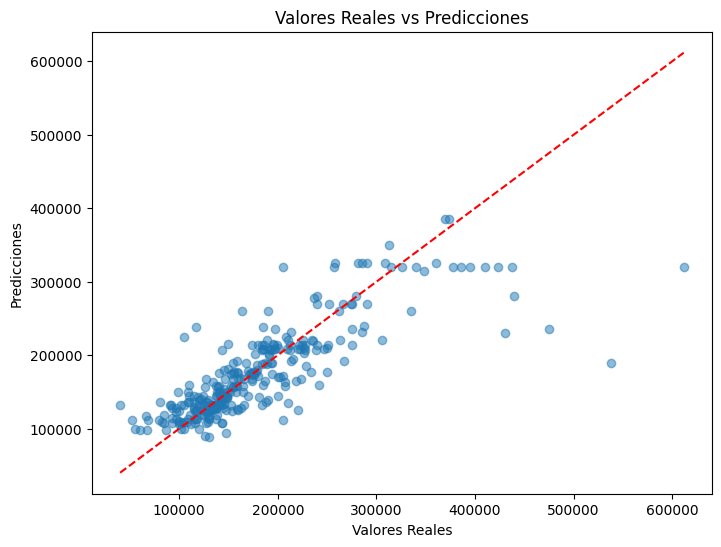

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

## 2. Analisis de Resultados

Métricas de error.


In [33]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  28767.95
MSE:  2308118730.18
RMSE: 48042.88
R²:   0.6503


El RMSE es mayor que el MAE, lo que indica que los errores grandes tienen más peso. Un RMSE cercano a 50 mil dólares puede resultar considerable.

Se observa que hay cierta alineación alrededor de la diagonal roja, lo cual refleja la correlación que respalda el R² de 0.65.

Aun así, se aprecian varios puntos alejados de la diagonal, lo que indica que el modelo subestima o sobreestima en ciertos casos. Es particularmente notorio en el rango de casas con precios más altos (por encima de 300,000 - 350,000) y también en algunos valores intermedios.

Para precios superiores a 400,000, existe mayor dispersión (el modelo a veces predice cerca de 300k o 350k cuando el precio real es mayor). Esto sugiere que el modelo no logra capturar todos los factores que diferencian a las casas muy caras o de rango superior.

Hacemos un análisis de residuos..

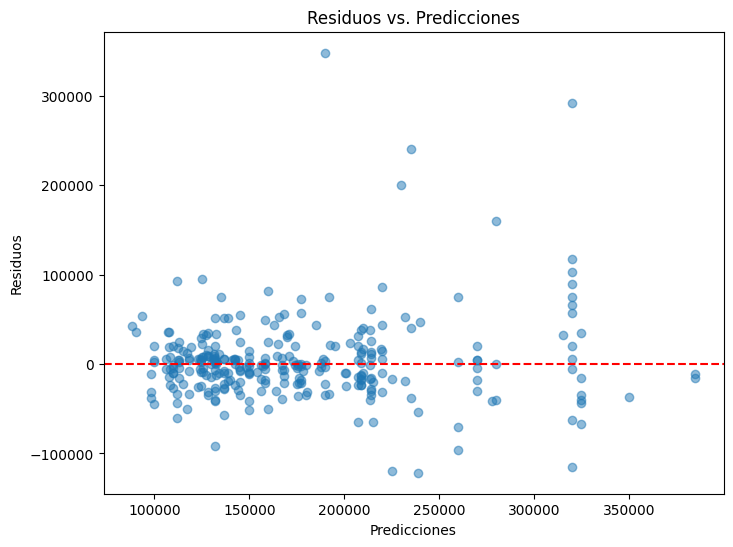

In [34]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuos vs. Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

En el rango de predicciones hasta unos 200k o 250k, muchos residuos están relativamente cerca de 0, lo cual indica que el modelo no comete errores tan grandes en esa zona.

Se observan varios puntos muy por encima de 0 (hasta más de 300k). Esos puntos significan que la casa tenía un valor de venta (real) mucho mayor que la predicción del modelo, por lo cual el modelo está subestimando fuertemente en esos casos.

Suele ocurrir en viviendas de precio elevado o con características especiales que el modelo no está captando bien.

También hay algunos puntos considerablemente por debajo de -100k, significando que en esos casos el modelo sobreestimó el precio de la casa.

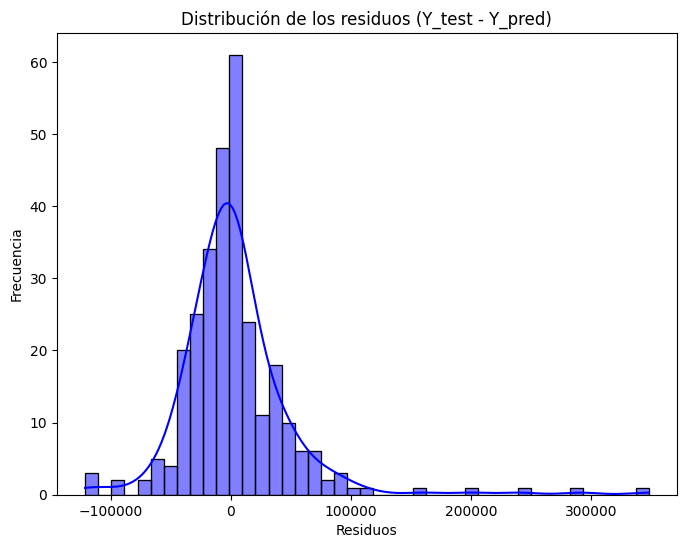

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Distribución de los residuos (Y_test - Y_pred)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

Se ve un pico principal cerca de 0, lo cual es bueno: la mayor parte de los errores están cerca de 0.

Sin embargo, la cola hacia la derecha (valores de 100,000 o más) es relativamente larga. Esto confirma que hay varios casos en los que el modelo subestima de forma significativa los precios.

La distribución no es perfectamente simétrica (no es exactamente una campana centrada en cero). Esto sugiere que el modelo tiende más a subestimar (errores positivos grandes) que a sobreestimar.

La presencia de algunos errores muy negativos también se ve, pero en menor medida.

## 3. Comparacion con Regresion Lineal y Arbol de Decision

In [36]:
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  28767.95
MSE:  2308118730.18
RMSE: 48042.88
R²:   0.6503


#### Resultados de cada modelo
- Arbol de decisión
    - R²: 0.71
    - MSE: 1906093576.18

- Regresión Lineal
    - R² test (Ridge): 0.780
    - MSE test (Ridge): 1454743698.07 

- Naive Bayes
    - MSE:  2308118730.18
    - R²:   0.6503


### Con base en los resultados anteriorires podemos concluir que 

- Regresión Lineal
    - R² test (Ridge): 0.780
    - MSE test (Ridge): 1454743698.07 
 
Esto significa que explica mejor la varianza del precio y, además, el error cuadrático medio es el más bajo de los tres modelos. Es, por tanto, el modelo con mejor desempeño global.

- Arbol de decisión
    - R²: 0.71
    - MSE: 1906093576.18
 
Aunque funciona razonablemente bien (R² de 0.71), tiene un MSE significativamente mayor que la regresión lineal regularizada. Los árboles de decisión pueden capturar interacciones no lineales, pero tienden a sobreajustar si no se ajustan correctamente sus hiperparámetros.

- Naive Bayes
    - MSE:  2308118730.18
    - R²:   0.6503
 
Es el que presenta peor desempeño en la predicción de un valor continuo (SalePrice), puesto que Naive Bayes no está realmente enfocado a un problema de regresión pura (se usa típicamente para clasificación). Su menor R² indica que explica menos la variabilidad de la variable objetivo y su MSE más alto indica que el error es mayor.

### Conclusión
- El modelo de Regresión Lineal (Ridge) es el más preciso de los tres, tanto por tener el R² más alto como por el MSE más bajo.

- Árbol de decisión se sitúa en segundo lugar, con un desempeño aceptable pero no superior a Ridge.

- Naive Bayes no es un método convencional para predecir valores continuos y sus resultados se ven reflejados en el menor R² y mayor MSE.

## 4. Clasificacion con Naive Bayes

Primero, volvemos a agregar la variable categorica creada en la entrega anterior

In [37]:
def categorize_price(price):
  if price < 85000:
    return 0
  elif price < 225000:
    return 1
  else:
    return 2

train_set_strat['PriceCategory'] = train_set_strat['SalePrice'].apply(categorize_price)
test_set_strat['PriceCategory'] = test_set_strat['SalePrice'].apply(categorize_price)

Luego, separamos en X e Y para ambos splits

In [38]:
X_train = train_set_strat.drop(columns=['SalePrice', 'PriceCategory'])
Y_train = train_set_strat['PriceCategory']

X_test = test_set_strat.drop(columns=['SalePrice', 'PriceCategory'])
Y_test = test_set_strat['PriceCategory']

Por ultimo, creamos y entrenamos el modelo

In [39]:
model = GaussianNB()

model.fit(X_train, Y_train)

GaussianNB()

## 5. Aplicacion del Modelo

Creamos predicciones para el conjunto de prueba utilizando el modelo creado en el inciso anterior

In [40]:
Y_pred = model.predict(X_test)

Luego, obtenemos algunas estadisticas basicas sobre nuestro modelo

In [41]:
print("\nReporte de Clasificación:\n", classification_report(Y_test, Y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.23      1.00      0.37        11
           1       0.98      0.61      0.75       220
           2       0.54      0.95      0.69        60

    accuracy                           0.69       291
   macro avg       0.58      0.85      0.60       291
weighted avg       0.86      0.69      0.72       291



## 6. Analisis con Matriz de Confusion

Creamos y graficamos la matriz de confusion

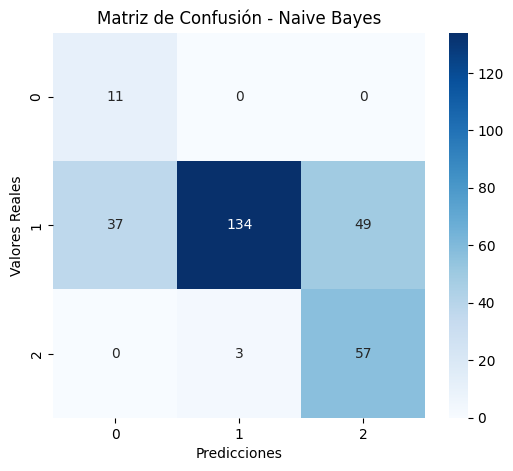

In [42]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Definir etiquetas de clases
class_labels = model.classes_

# Crear el heatmap con Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

## Inciso 7 analizar 
🔹Clase 0:
Verdaderos positivos (TP): 11

Falsos negativos (FN): 0 mal clasificados como otras clases.

Falsos positivos (FP): 37 del grupo 1 que fueron mal clasificados como 0.

Problema: el modelo no predice clase 0 para otros datos, lo que sugiere poca representatividad o mala separación de clase 0 en los datos.

🔹 Clase 1:
TP: 134 (alto)

FN: 37 (mal clasificados como clase 0) y 49 (mal clasificados como clase 2)

FP: 3 (de clase 2) que fueron clasificados como clase 1

Mejor desempeño relativo, pero con confusión importante con clases 0 y 2.

🔹 Clase 2:
TP: 57

FN: 3 (mal clasificados como clase 1)

FP: 49 (del grupo 1) mal clasificados como 2

Desempeño decente, pero también confundida con clase 1.

- posibles soluciones

Normalizar o estandarizar datos si no lo has hecho.

Verificar balance de clases: usar np.bincount(Y_train) para ver si hay desbalance.

Seleccionar o generar nuevas características para mejorar la separación entre clases.

Considerar modelos más robustos (Random Forest, SVM, etc.) si Naive Bayes no logra buenos resultados por suposiciones fuertes de independencia.

## Inciso 8 Validacion cruzada

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

# X e Y sin particionar
X = dftrain.drop(columns=["SalePrice"])
Y = dftrain["SalePrice"]

model_cv = GaussianNB()
cv_scores = cross_val_score(model_cv, X, Y, cv=5, scoring='accuracy')

print("Accuracies por fold:", cv_scores)
print("Promedio de accuracy (cross-validation):", np.mean(cv_scores))


c:\Users\jjcam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracies por fold: [0.0137457  0.01034483 0.01724138 0.02068966 0.01724138]
Promedio de accuracy (cross-validation): 0.01585258916933286


Interpretacion inciso 8:
Muy bajo rendimiento general:

Un accuracy de 1.6% indica que el modelo está clasificando aleatoriamente o no aprendiendo nada útil.

En clasificación, un accuracy tan bajo sugiere que hay demasiadas clases con muy poca información o mal balanceadas.

Posible causa principal:

Tu variable objetivo SalePrice no ha sido discretizada y aún contiene cientos de valores diferentes (es numérica continua).

Naive Bayes no puede predecir regresión continua, solo clasificación en categorías.